In [97]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from collections import Counter
from sklearn.cluster import DBSCAN
import pandas as pd
from src.utils_clustering import *

In [99]:
N_CLASSES = 15

In [100]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [101]:
dbscan_clustering = DBSCAN(eps=0.04, min_samples=10)
labels_pred = dbscan_clustering.fit_predict(processed_data)

In [102]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({2: 1011, 0: 985, 8: 688, 5: 671, 7: 339, 6: 333, 4: 324, 1: 317, 3: 313, -1: 19})


In [103]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [104]:
clustering_algorithm_name = 'DBSCAN_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

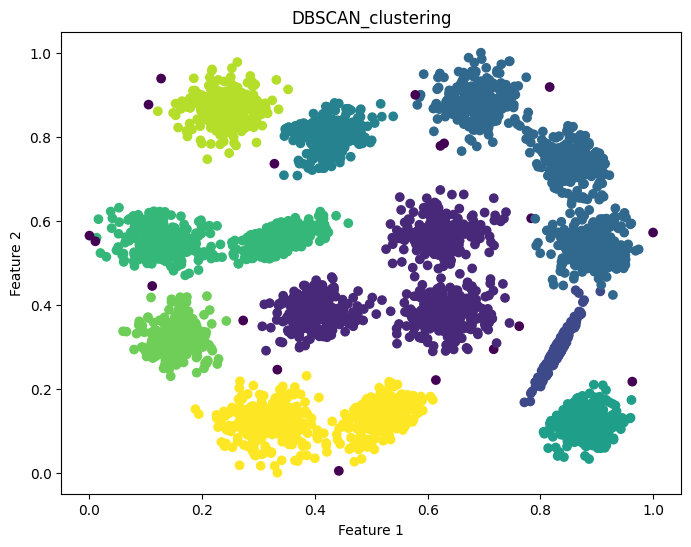

In [105]:
plot_clusters(processed_data, labels_pred, title=clustering_algorithm_name)

In [106]:
labels_pred = map_clusters_to_ground_truth_dbscan(labels_true, labels_pred)

Confusion Matrix:


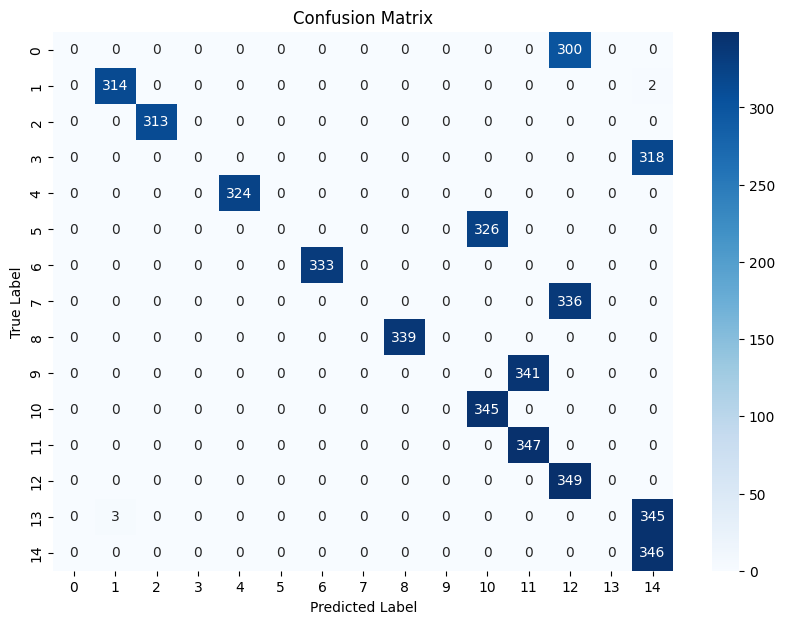

Each cluster's accuracy indicates how well the clustering algorithm has grouped the data points,
compared to the ground truth labels. Higher accuracy means a closer match to the expected grouping.

Cluster 1 Accuracy: 0.00%
Cluster 2 Accuracy: 99.37%
Cluster 3 Accuracy: 100.00%
Cluster 4 Accuracy: 0.00%
Cluster 5 Accuracy: 100.00%
Cluster 6 Accuracy: 0.00%
Cluster 7 Accuracy: 100.00%
Cluster 8 Accuracy: 0.00%
Cluster 9 Accuracy: 100.00%
Cluster 10 Accuracy: 0.00%
Cluster 11 Accuracy: 100.00%
Cluster 12 Accuracy: 100.00%
Cluster 13 Accuracy: 100.00%
Cluster 14 Accuracy: 0.00%
Cluster 15 Accuracy: 100.00%

Overall Accuracy: 60.20%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [110]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [ ]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path)

In [ ]:
# TODO: Save clustering algorithm parameters to the csv